# Modelos epidemiológicos, caso SEIR 
## Authors
- [Guillermo](https://github.com/memoherreraacosta)
- [Daniela](https://github.com/Guemez)


## Time-Dependent Variables
* Here’s an updated list of the variables we currently use:
- N: total population
- S(t): number of people susceptible on day t
- E(t): number of people exposed on day t
- I(t): number of people infected on day t
- R(t): number of people recovered on day t
- D(t): number of people dead on day t

- β: expected amount of people an infected person infects per day
- D: number of days an infected person has and can spread the disease
- γ: the proportion of infected recovering per day (γ = 1/D)
- R₀: the total number of people an infected person infects (R₀ = β / γ)
- δ: length of incubation period
- α: fatality rate
- ρ: rate at which people die (= 1/days from infected until death)

### Imports

In [36]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

### Variables and methods definition for the model

In [37]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    Z = np.random.uniform(0,1)
    S, E, I, R, D = y
    dSdt = (-beta(t) * S * I / N ) 
    #print(dSdt)
    dEdt = (beta(t) * S * I / N - delta * E ) 
    #print(dEdt)
    dIdt = (delta * E - (1 - alpha) * gamma * I - alpha * rho * I )
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

def R_0(t):
    return 2.5 if t < L else 1.2

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

#N = 6220145
N = 6220
D = 10.0 
gamma = 1.0 / D
delta = 1.0 / 6.0
R_0_start, k, x0, R_0_end = 2.5, 0.1, 50, 0.9
alpha = 0.096733  # % death rate
rho = 1/10.5844  # days from infection until death

L = 50

In [38]:
def plotseird(t, S, E, I, R, D, L=None, R0=None):
    fp, axp = plt.subplots(1,1,figsize=(10,4))
    axp.plot(t, S, 'b', linewidth=2, label='Suceptibles')
    axp.plot(t, E, 'y', linewidth=2, label='Expuestos')
    axp.plot(t, I, 'r', linewidth=2, label='Infectados')
    axp.plot(t, R, 'g', linewidth=2, label='Recuperados')
    axp.plot(t, D, 'k', linewidth=2, label='Muertos')
    axp.set_xlabel('Tiempo (dias)')
    legend = axp.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    if L is not None:
        plt.title("Encierro en el día {} ".format(L))
    plt.show()

    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, E, 'y', linewidth=2, label='Expuestos')
    ax.plot(t, I, 'r', linewidth=2, label='Infectados')
    ax.plot(t, R, 'g', linewidth=2, label='Recuperados')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Muertos')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()
  
    f0, ax0 = plt.subplots(1,1,figsize=(10,4))
    ax0.plot(t, S, 'b', linewidth=2, label='Susceptible')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax0.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()

    f2, ax1 = plt.subplots(1,1,figsize=(10,4))
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R0')

    ax1.set_xlabel('Tiempo (dias)')
    ax1.title.set_text('R0 con el tiempo')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show()


def data_time(t,data):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Suceptibles','Expuestos', 'Infectados', 'Recuperados', 'Muertos'
    datos = data[t]
    sizes = datos[1:]
    explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(datos, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    barrasd = []
    mE = []
    mI = []
    mR = []
    mD = []
    c = []
    for i in range(0,len(newRet),10):
        barrasd.append(newRet[i][1:])
        mE.append(newRet[i][1])
        mI.append(newRet[i][2])
        mR.append(newRet[i][3])
        mD.append(newRet[i][4])
        c.append(i)
        #print(i)
    #print(barrasd)
    n_groups = len(barrasd)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.20
    opacity = 0.8

    rects1 = plt.bar(index, mE, bar_width,
    alpha=opacity,
    color='b',
    label='Exposed')
    rects2 = plt.bar(index + bar_width, mI, bar_width,
    alpha=opacity,
    color='r',
    label='Infected')
    rects3 = plt.bar(index + bar_width*2, mR, bar_width,
    alpha=opacity,
    color='y',
    label='Recovered')
    rects4 = plt.bar(index + bar_width*3, mD, bar_width,
    alpha=opacity,
    color='g',
    label='Dead')

    plt.xlabel('Days')
    plt.ylabel('People')
    plt.title('Scores')
    plt.xticks(index + bar_width, c)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [39]:
def seir(L, lockdown_start, days):
    x0 = lockdown_start
    # initial conditions
    S0, E0, I0, R0, D0 = N-8, 6, 2, 0, 0
    # Grid of time points (in days)
    t = np.linspace(0, days, days)
    # Initial conditions vector
    y0 = S0, E0, I0, R0, D0 
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
    newRet = np.zeros((len(ret),5))
    for d in range(len(ret)):
        s = sum(ret[d])
        prob = [ret[d][0]/s,ret[d][1]/s,ret[d][2]/s,ret[d][3]/s,ret[d][4]/s]
        #printProgressBar(ret[d][0]/s,1)
        for i in range (N):
            ch = np.random.choice([0,1,2,3,4], p= prob)
            if(ch == 0):
                newRet[d][ch] += 1*1000
            else: 
                newRet[d][ch] += 1*10
            #print(ch)
        #print(newRet[d])
    S, E, I, R, D = newRet.T
    R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
    plotseird(t, S, E, I, R, D, R0=R0_over_time)
    data_time(lockdown_start,ret)
              
    print("En el dia 200")
    #print("Numero de personas Suceptibles: {0}".format(S[-1]))
    print("Numero de personas Expuestas: {0}".format(E[-1]))
    print("Numero de personas Infectadas: {0}".format(I[-1]))
    print("Numero de personas Recuperadas: {0}".format(R[-1]))
    print("Numero de personas Fallecidas: {0}".format(D[-1]))


### Model with 10 days of Quarantine

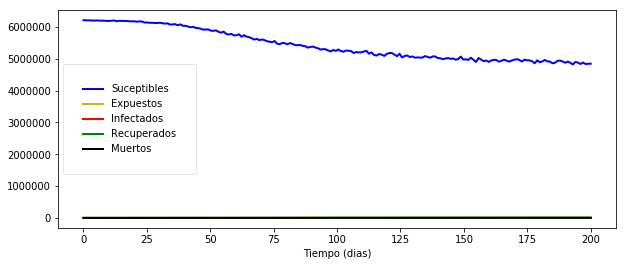

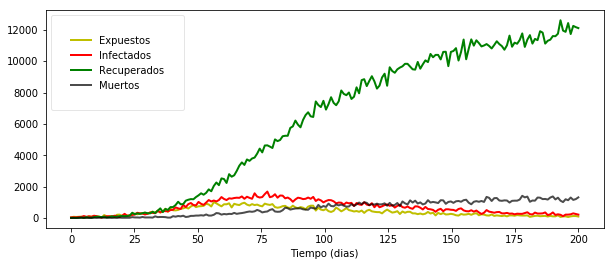

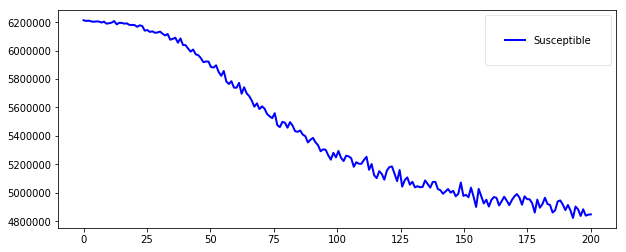

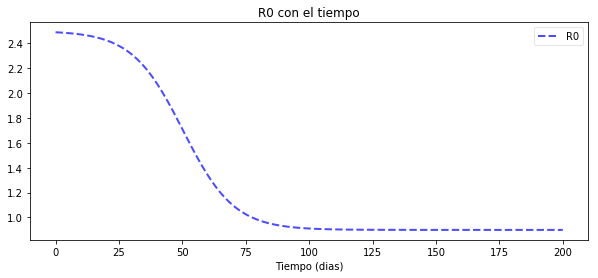

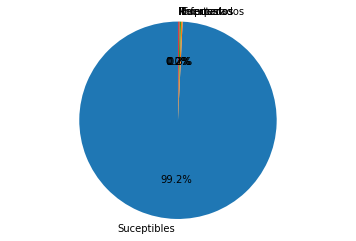

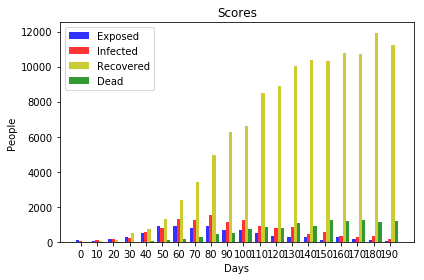

En el dia 200
Numero de personas Expuestas: 90.0
Numero de personas Infectadas: 210.0
Numero de personas Recuperadas: 12110.0
Numero de personas Fallecidas: 1310.0


In [40]:
seir(L=10, lockdown_start=20, days=200)

### Model with 40 days of Quarantine

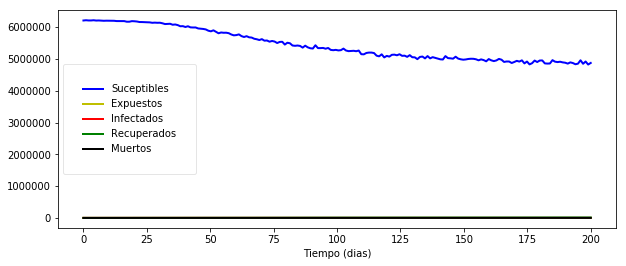

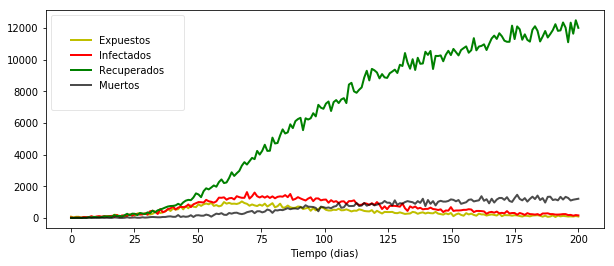

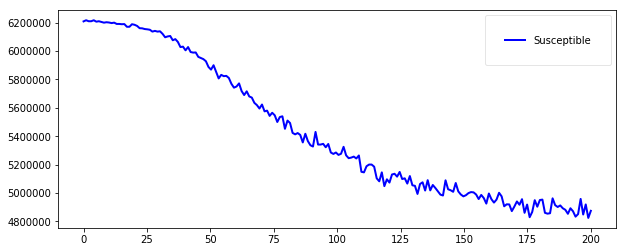

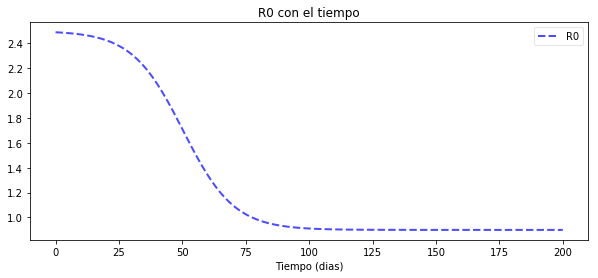

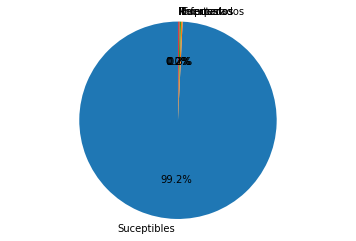

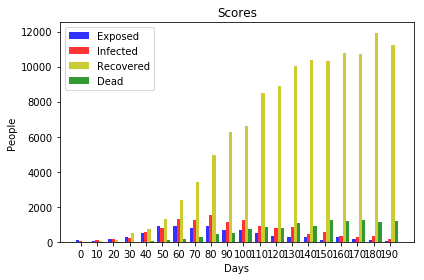

En el dia 200
Numero de personas Expuestas: 90.0
Numero de personas Infectadas: 160.0
Numero de personas Recuperadas: 12000.0
Numero de personas Fallecidas: 1210.0


In [41]:
seir(L=40, lockdown_start=20, days=200)

### Model with 80 days of Quarantine

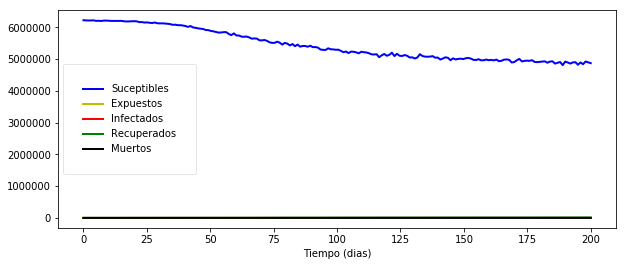

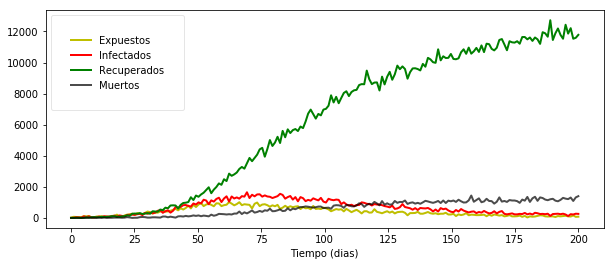

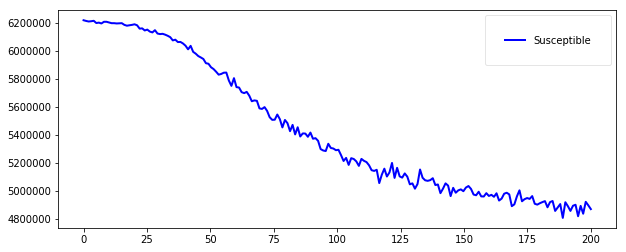

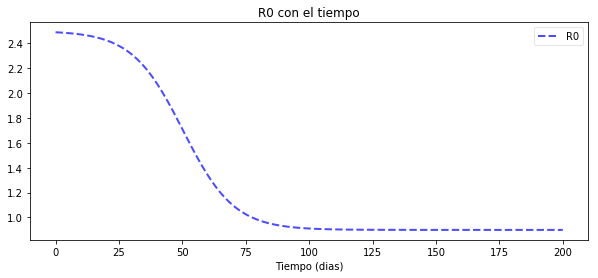

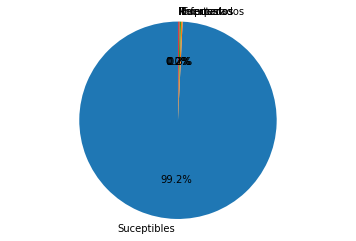

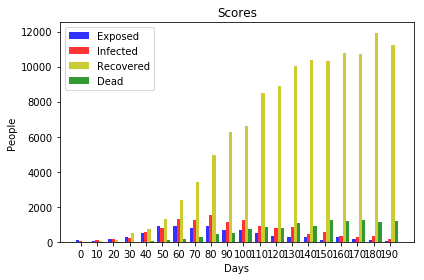

A los 200 días
Numero de personas Expuestas: 80.0
Numero de personas Infectadas: 260.0
Numero de personas Recuperadas: 11780.0
Numero de personas Fallecidas: 1400.0


In [29]:
seir(L=80, lockdown_start=20, days=200)